<a href="https://colab.research.google.com/github/Safhanafarha775/virtual_quality_inspector/blob/main/Visual_Quality_Inspector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install OpenCV
!pip install opencv-python numpy matplotlib

In [2]:
# Upload your image
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

print("📸 Upload an image from your phone or computer...")
uploaded = files.upload()

📸 Upload an image from your phone or computer...


Saving 20251201_1029_Scattered Desk Essentials_simple_compose_01kbc4c3qzfdca0x23ct6tcyga.png to 20251201_1029_Scattered Desk Essentials_simple_compose_01kbc4c3qzfdca0x23ct6tcyga.png


In [3]:
# Simple Quality Check Function
def simple_quality_check(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to grayscale for analysis
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. Check image size
    height, width = gray.shape
    print(f"📐 Image Size: {width} x {height} pixels")

    # 2. Check brightness level
    brightness = np.mean(gray)
    print(f"💡 Average Brightness: {brightness:.1f} (0-255 scale)")

    # 3. Check focus/sharpness
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    print(f"🎯 Sharpness Score: {sharpness:.1f}")

    # 4. Display results
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original image
    axes[0].imshow(img_rgb)
    axes[0].set_title('Your Uploaded Image')
    axes[0].axis('off')

    # Grayscale version
    axes[1].imshow(gray, cmap='gray')
    axes[1].set_title('Grayscale Analysis')
    axes[1].axis('off')

    plt.show()

    # Simple quality decision
    if sharpness > 100:
        return "✅ PASS - Image is clear"
    else:
        return "⚠️  CHECK - Image might be blurry"


🏭 VIRTUAL QUALITY INSPECTOR REPORT

🔍 Analyzing: 20251201_1029_Scattered Desk Essentials_simple_compose_01kbc4c3qzfdca0x23ct6tcyga.png
📐 Image Size: 1024 x 1536 pixels
💡 Average Brightness: 82.4 (0-255 scale)
🎯 Sharpness Score: 1297.1


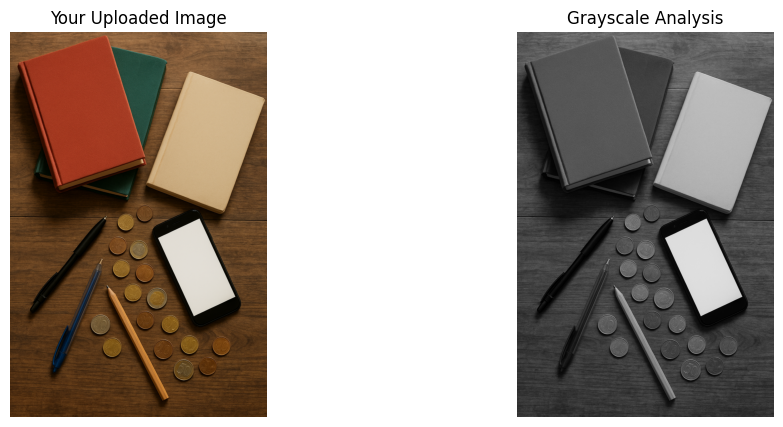

📋 Result: ✅ PASS - Image is clear


In [4]:
# Run the check on your uploaded image
print("\n" + "="*50)
print("🏭 VIRTUAL QUALITY INSPECTOR REPORT")
print("="*50)

for filename in uploaded.keys():
    print(f"\n🔍 Analyzing: {filename}")
    result = simple_quality_check(filename)
    print(f"📋 Result: {result}")


🔍 DEFECT DETECTION ANALYSIS


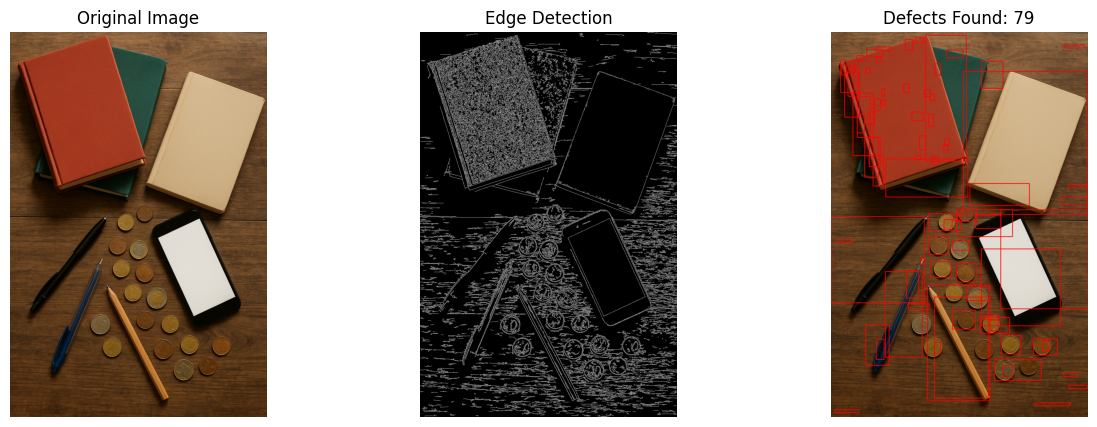


📊 DEFECT ANALYSIS RESULTS:
   Total contours found: 8562
   Potential defects: 79

📋 FINAL VERDICT: ❌ REJECT - Multiple defects found


In [5]:
# DEFECT DETECTOR - Find scratches, dents, anomalies
def defect_detector(image_path):
    print("\n" + "="*50)
    print("🔍 DEFECT DETECTION ANALYSIS")
    print("="*50)

    # Read and prepare image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. Edge Detection (finds sharp changes = potential defects)
    edges = cv2.Canny(gray, 50, 150)

    # 2. Find contours (connected edge points)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 3. Filter and count real defects
    defect_count = 0
    defect_image = img.copy()

    for contour in contours:
        area = cv2.contourArea(contour)
        # Only count medium-sized areas (not noise, not the whole object)
        if 50 < area < 2000:
            defect_count += 1
            # Draw red box around defect
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(defect_image, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # 4. Convert for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    defect_rgb = cv2.cvtColor(defect_image, cv2.COLOR_BGR2RGB)

    # 5. Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title(f'Edge Detection')
    axes[1].axis('off')

    axes[2].imshow(defect_rgb)
    axes[2].set_title(f'Defects Found: {defect_count}')
    axes[2].axis('off')

    plt.show()

    # 6. Quality decision
    print(f"\n📊 DEFECT ANALYSIS RESULTS:")
    print(f"   Total contours found: {len(contours)}")
    print(f"   Potential defects: {defect_count}")

    if defect_count == 0:
        return "✅ EXCELLENT - No defects detected"
    elif defect_count < 5:
        return "⚠️  ACCEPTABLE - Minor anomalies"
    else:
        return "❌ REJECT - Multiple defects found"

# CELL 6: Run defect detection on your image
for filename in uploaded.keys():
    result = defect_detector(filename)
    print(f"\n📋 FINAL VERDICT: {result}")